# Load data from STL10 

In [1]:
import torch
import matplotlib.pyplot as plt
import torchvision.datasets as dset
import torchvision
import numpy as np
from visulize import visulize
from Dataset import STL10_Relable

%load_ext autoreload
%autoreload 2

%matplotlib inline

n = 4

dataset = STL10_Relable()
print(dataset)
dataset_subset = torch.utils.data.Subset(dataset, np.random.choice(len(dataset), n**2, replace=False))

Files already downloaded and verified
Dataset STL10_Relable
    Number of datapoints: 100000
    Root location: ./
    Split: unlabeled


# Visulize dataset

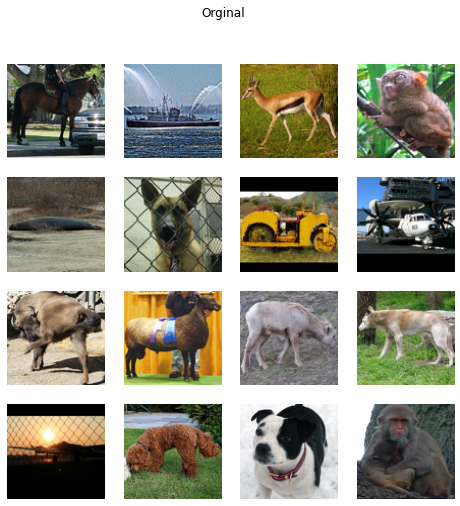

In [2]:
T = torchvision.transforms.Compose([torchvision.transforms.ToPILImage(),torchvision.transforms.Grayscale(),torchvision.transforms.ToTensor()])
visulize(n, dataset_subset, title = 'Orginal', datapos = 1)

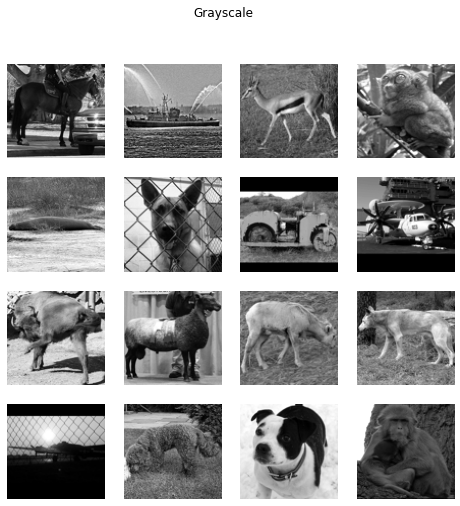

In [3]:
visulize(n, dataset_subset, title = 'Grayscale', cmap = 'gray')

# Visulize Initial Model
Colorizer should output a gray image  
Discriminator should output a tensor with shape [1,2]

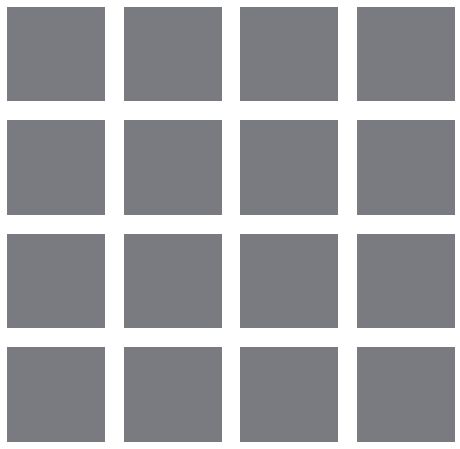

In [4]:
from model import Colorizer, Discriminator
mG = Colorizer()
mD = Discriminator()

visulize(n, dataset_subset, lambda x: mG(T(x).unsqueeze(0))[0])

In [5]:
example = dataset.__getitem__(0)[0]
example = mG(T(example).unsqueeze(0))
print(mD(example))

tensor([[-0.7027, -0.6837]], grad_fn=<LogSoftmaxBackward>)


# Pretrain Colorizer with orginal image

In [11]:
from Trainer import Trainer

tr = Trainer(mG, mD, dataset)
tr.pretrain(1, timeout = 1000)

(pretrain Epcho 1 / 1) Training process : 33.700% Timed out                                        


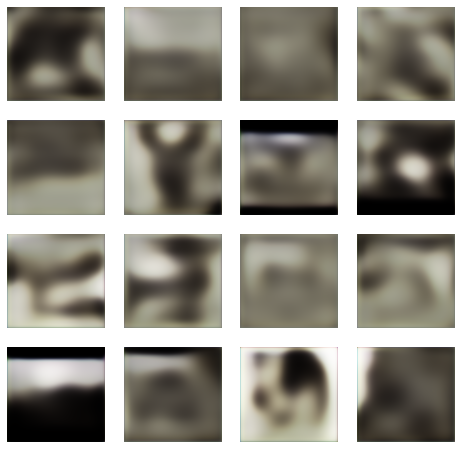

In [12]:
visulize(n, dataset_subset, lambda x: mG(T(x).unsqueeze(0))[0])